### 1.Import Library

In [38]:
import pandas as pd
import json
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

### 2.Evaluation Precision, Recall, F1-score, Accuracy, Exact Match.

In [ ]:
def plot_metrics(metrics_dict):
    metrics_df = pd.DataFrame(list(metrics_dict.items()), columns=["Metric", "Score"])

    plt.figure(figsize=(10, 5))
    sns.set(style="whitegrid")

    # 🎨 Bảng màu chuyên nghiệp: navy - olive - gold - grey - teal
    pro_palette = ["#003f5c", "#7a5195", "#ef5675", "#ffa600", "#58508d"]

    # Barplot với bảng màu cao cấp
    sns.barplot(data=metrics_df, x="Metric", y="Score", palette=pro_palette)

    # Giá trị phần trăm trên cột
    for index, row in metrics_df.iterrows():
        plt.text(index, row["Score"] + 0.015, f"{row['Score']:.2%}",
                 ha='center', va='bottom', fontsize=11, fontweight='semibold', color="#222")

    # Tiêu đề và trục
    plt.title("Đánh giá khả năng prompting cho tác vụ Extract Entity – Gemini Model", 
              fontsize=16, fontweight='bold', color="#1a1a1a")

    plt.ylim(0, 1.15)
    plt.ylabel("Score (%)", fontsize=12)
    plt.xlabel("")
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    sns.despine()

    # Bố cục gọn gàng
    plt.tight_layout()
    plt.show()


In [40]:

def evaluate_entities(pred_entities, true_entities, all_keys):
    y_true = []
    y_pred = []

    for key in all_keys:
        y_true.append(key in true_entities and bool(true_entities[key]))
        y_pred.append(key in pred_entities and bool(pred_entities[key]))

    return y_true, y_pred

def compute_exact_match(pred_entities, true_entities):
    return pred_entities == true_entities

def load_and_evaluate(file_path):
    df = pd.read_excel(file_path, engine="openpyxl")

    all_keys = set()
    for val in df["entities_label"]:
        try:
            entity_dict = json.loads(val)
            all_keys.update(entity_dict.keys())
        except:
            pass

    all_y_true = []
    all_y_pred = []
    exact_matches = []

    print("Các dòng sai (Exact Match = False):\n")

    for idx, row in df.iterrows():
        try:
            pred_dict = json.loads(row["predict_entities"])
        except:
            pred_dict = {}

        try:
            label_dict = json.loads(row["entities_label"])
        except:
            label_dict = {}

        y_true, y_pred = evaluate_entities(pred_dict, label_dict, all_keys)
        all_y_true.extend(y_true)
        all_y_pred.extend(y_pred)

        is_exact = compute_exact_match(pred_dict, label_dict)
        exact_matches.append(is_exact)

        # Nếu sai thì in ra thông tin
        if not is_exact:
            print(f"Dòng {idx + 2} (Excel):")
            print(f"- Dự đoán     : {json.dumps(pred_dict, ensure_ascii=False)}")
            print(f"- Nhãn đúng   : {json.dumps(label_dict, ensure_ascii=False)}")
            print("------------------------------------------------------")

    precision = precision_score(all_y_true, all_y_pred)
    recall = recall_score(all_y_true, all_y_pred)
    f1 = f1_score(all_y_true, all_y_pred)
    accuracy = accuracy_score(all_y_true, all_y_pred)
    exact_match_score = sum(exact_matches) / len(exact_matches)

    metrics = {
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "Accuracy": accuracy,
        "Exact Match": exact_match_score
    }

    plot_metrics(metrics)

Các dòng sai (Exact Match = False):

Dòng 10 (Excel):
- Dự đoán     : {"LoaiVanBanFilter": "Thông tư"}
- Nhãn đúng   : {"LoaiVanBanFilter": "Thông tư", "NgayBanHanhFilter": "2020", "NoibanHanhFilter": "Bộ Tư pháp"}
------------------------------------------------------
Dòng 64 (Excel):
- Dự đoán     : {"LoaiVanBanFilter": "Nghị định"}
- Nhãn đúng   : {"LoaiVanBanFilter": "Nghị định", "NoibanHanhFilter": "Chính phủ", "NgayBanHanhFilter": "2014"}
------------------------------------------------------
Dòng 83 (Excel):
- Dự đoán     : {"LoaiVanBanFilter": "Luật"}
- Nhãn đúng   : {"LoaiVanBanFilter": "Luật", "NoibanHanhFilter": "Quốc hội", "NgayBanHanhFilter": "17/06/2010"}
------------------------------------------------------
Dòng 92 (Excel):
- Dự đoán     : {"LoaiVanBanFilter": "Luật"}
- Nhãn đúng   : {"LoaiVanBanFilter": "Luật", "NoibanHanhFilter": "Quốc hội", "NgayBanHanhFilter": "2014"}
------------------------------------------------------
Dòng 101 (Excel):
- Dự đoán     : {"LoaiVanB

C:\Users\hdang\AppData\Local\Temp\ipykernel_25668\3944048122.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df, x="Metric", y="Score", palette=pro_palette)


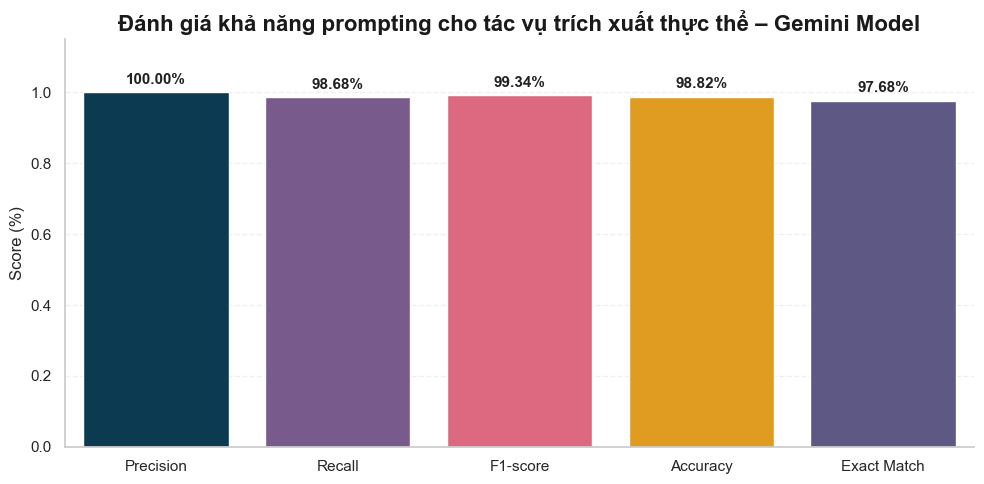

In [41]:
# Gọi hàm đánh giá
file_path = "../data_danhgia_module_router_generate/eval_entities_extract.xlsx"
load_and_evaluate(file_path)